# 4.7 Deriving New Variables Task

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os

## This script contains the following points:
## Step 1
## Step 2
## Step 3
## Step 4
## Step 5
## Step 7

## Step 1

In [3]:
path = r"C:\Users\wallm\11 2024 Instacart Basket Analysis 1"

In [7]:
path

'C:\\Users\\wallm\\11 2024 Instacart Basket Analysis 1'

In [5]:
# Import ords_prods_merge
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge.pkl'))

In [7]:
# Create a subset of the dataframe for now—the first one million rows, to avoid any potential issues with large dataframe
df = ords_prods_merge[:1000000]

In [9]:
# Check subset
df.shape

(1000000, 16)

In [11]:
df.head ()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0,product_name,aisle_id,department_id,prices,Match
0,2539329,1,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both
1,2539329,1,1,2,8,NaN,14084,2,0,both,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both
2,2539329,1,1,2,8,NaN,12427,3,0,both,12427,Original Beef Jerky,23,19,4.4,both
3,2539329,1,1,2,8,NaN,26088,4,0,both,26089,Aged White Cheddar Popcorn,23,19,4.7,both
4,2539329,1,1,2,8,NaN,26405,5,0,both,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both


##### If-Statements with User-Defined Functions

In [11]:
# Define a 'price_label' function

# If the value within the “prices” column within the given row is less than or equal to 5, then return the string “Low-range product.”

# Or else, if the value within the “prices” column within the given row is greater than 5 and less than or equal to 15, then return the string “Mid-range product.”

# Or else, if the value of the “prices” column within the given row is greater than 15, then return the string “High-range product.”

# Or else, return the string “Not enough data.”

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [13]:
# Apply the function

# df['price_range'] has been used - creates a new column within the df dataframe called “price_range” and designates it as the location for your labels.

df['price_range'] = df.apply(price_label, axis=1)

C:\Users\wallm\AppData\Local\Temp\ipykernel_2172\1989391447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [15]:
df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    673183
Low-range product    314392
High range            12425
Name: count, dtype: int64

In [16]:
df['prices'].max()

99999.0

##### Does not match the Exercise value, but follows the same code. Further investigation below...

In [18]:
print(df['prices'].describe())
print(df['prices'].value_counts().sort_index())

count    1000000.000000
mean          11.396794
std          425.994349
min            1.000000
25%            4.200000
50%            7.400000
75%           11.300000
max        99999.000000
Name: prices, dtype: float64
prices
1.0         3586
1.1         7279
1.2         7568
1.3        12858
1.4        11830
           ...  
24.8          14
24.9         158
25.0         384
14900.0      142
99999.0       15
Name: count, Length: 239, dtype: int64


In [19]:
print(df['prices'].dtype)


float64


In [20]:
print(df['prices'])


0          9.0
1         12.5
2          4.4
3          4.7
4          1.0
          ... 
999995    12.9
999996     7.3
999997     3.5
999998     6.8
999999     2.9
Name: prices, Length: 1000000, dtype: float64


In [21]:
print(df['prices'].unique())


[9.0000e+00 1.2500e+01 4.4000e+00 4.7000e+00 1.0000e+00 3.0000e+00
 1.0300e+01 4.0000e+00 8.6000e+00 3.2000e+00 2.7000e+00 1.4000e+01
 5.0000e+00 1.3400e+01 1.8000e+00 6.8000e+00 1.2600e+01 1.3000e+00
 5.2000e+00 6.3000e+00 2.3000e+00 1.0900e+01 4.1000e+00 9.4000e+00
 1.4800e+01 7.5000e+00 2.5000e+00 2.0000e+00 3.5000e+00 3.9000e+00
 6.6000e+00 6.2000e+00 7.1000e+00 5.8000e+00 8.9000e+00 9.1000e+00
 5.5000e+00 1.2300e+01 1.0800e+01 5.9000e+00 2.9000e+00 1.6000e+00
 3.4000e+00 5.1000e+00 1.1700e+01 6.9000e+00 1.3300e+01 9.7000e+00
 4.3000e+00 5.7000e+00 1.1800e+01 1.0400e+01 1.0000e+01 9.8000e+00
 4.5000e+00 1.3200e+01 1.0100e+01 8.7000e+00 6.4000e+00 8.2000e+00
 9.9000e+00 2.6000e+00 2.4000e+00 1.4200e+01 8.8000e+00 7.9000e+00
 1.2700e+01 3.1000e+00 1.3700e+01 1.1600e+01 1.0200e+01 1.1100e+01
 6.7000e+00 1.2800e+01 6.5000e+00 7.0000e+00 7.7000e+00 1.1300e+01
 9.6000e+00 7.4000e+00 1.7000e+00 5.3000e+00 6.0000e+00 1.4400e+01
 7.2000e+00 9.5000e+00 1.4000e+00 7.3000e+00 1.1500e+01 1.4300

In [22]:
print(df['prices'].sort_values())


907817        1.0
156400        1.0
287966        1.0
772860        1.0
667555        1.0
           ...   
499158    99999.0
499180    99999.0
767485    99999.0
767471    99999.0
128924    99999.0
Name: prices, Length: 1000000, dtype: float64


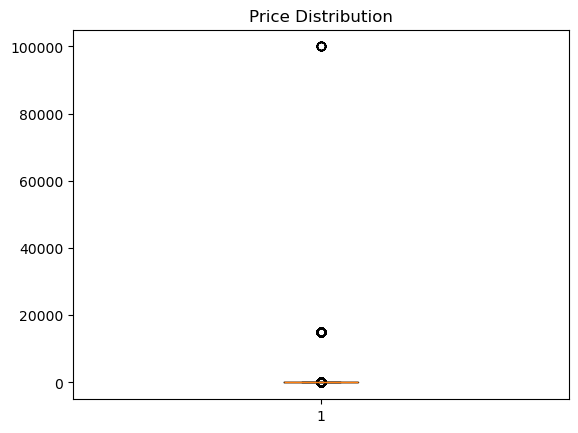

In [23]:
import matplotlib.pyplot as plt

plt.boxplot(df['prices'])
plt.title('Price Distribution')
plt.show()


##### If-Statements with the loc() Function

##### Using loc(), you can apply the conditional logic of an if-statement to a function without explicitly creating an if-else construct.

In [26]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High_range_product'

C:\Users\wallm\AppData\Local\Temp\ipykernel_320\1555639939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High_range_product'


In [27]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid_range-product'

In [28]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low_range_product'

In [29]:
df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid_range-product     673183
Low_range_product     314392
High_range_product     12425
Name: count, dtype: int64

#####  loc() works faster, you can repeat the process — this time, on your entire dataframe

In [31]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [32]:
ords_prods_merge.loc[(ords_prods_merge['prices'] <= 15) & (ords_prods_merge['prices'] > 5), 'price_range_loc'] = 'Mid-range product'


In [33]:
ords_prods_merge.loc[ords_prods_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'


In [34]:
ords_prods_merge['price_range_loc'].value_counts(dropna=False)


price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

##### If-Statements with For-Loops

In [36]:
# Exercise example

for x in range(30,45):
    print("My age is %d" % (x))

My age is 30
My age is 31
My age is 32
My age is 33
My age is 34
My age is 35
My age is 36
My age is 37
My age is 38
My age is 39
My age is 40
My age is 41
My age is 42
My age is 43
My age is 44


In [37]:
#  which day most orders take place
ords_prods_merge['orders_day_of_week'].value_counts(dropna=False)

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [17]:
# compare its value with what you know are the busiest and slowest days, and assign it the corresponding string value.

result = []

for value in ords_prods_merge["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [39]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy

In [19]:
# create a new column within your ords_prods_merge dataframe and set it equal to result

ords_prods_merge['busiest_day'] = result

In [41]:
ords_prods_merge['busiest_day'].value_counts(dropna=False)


busiest_day
Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: count, dtype: int64

In [23]:
ords_prods_merge.head(13)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0,product_name,aisle_id,department_id,prices,Match,busiest_day
0,2539329,1,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both,Regularly busy
1,2539329,1,1,2,8,NaN,14084,2,0,both,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy
2,2539329,1,1,2,8,NaN,12427,3,0,both,12427,Original Beef Jerky,23,19,4.4,both,Regularly busy
3,2539329,1,1,2,8,NaN,26088,4,0,both,26089,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy
4,2539329,1,1,2,8,NaN,26405,5,0,both,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy
5,2398795,1,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,both,Regularly busy
6,2398795,1,2,3,7,15.0,10258,2,0,both,10258,Pistachios,117,19,3.0,both,Regularly busy
7,2398795,1,2,3,7,15.0,12427,3,1,both,12427,Original Beef Jerky,23,19,4.4,both,Regularly busy
8,2398795,1,2,3,7,15.0,13176,4,0,both,13176,Bag of Organic Bananas,24,4,10.3,both,Regularly busy
9,2398795,1,2,3,7,15.0,26088,5,1,both,26089,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy


## Step 2

##### Suppose your clients have changed their minds about the labels you created in your “busiest_day” column. Now, they want “Busiest day” to become “Busiest days” (plural). This label should correspond with the two busiest days of the week as opposed to the single busiest day. At the same time, they’d also like to know the two slowest days. Create a new column for this using a suitable method.

In [25]:
# View which days are busiest
ords_prods_merge['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [27]:
# Find the two busiest days and two slowest days based on value counts
busiest_days = ords_prods_merge['orders_day_of_week'].value_counts().index[:2]  # Top 2 busiest days
slowest_days = ords_prods_merge['orders_day_of_week'].value_counts().index[-2:]  # Bottom 2 slowest days

In [29]:
# Initialize an empty list to store the labels
result = []

In [31]:
# Loop through the 'orders_day_of_week' column and assign labels
for value in ords_prods_merge['orders_day_of_week']:
    if value in busiest_days:
        result.append("Busiest days")
    elif value in slowest_days:
        result.append("Least busy days")
    else:
        result.append("Regularly busy")

In [37]:
# Create a new column with the updated labels
ords_prods_merge['busiest_days'] = result

In [39]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Least busy days',
 'Least busy days',
 'Least busy days',


In [41]:
ords_prods_merge['busiest_days'].value_counts(dropna=False)

busiest_days
Regularly busy     12916111
Busiest days       11864412
Least busy days     7624336
Name: count, dtype: int64

## Step 3

In [ ]:
# Check the distribution of the new column to verify the values
busiest_day_counts = ords_prods_merge['busiest_day'].value_counts(dropna=False)

# Display the result
print(busiest_day_counts)

In [ ]:
# Calculate the total count of all values in the 'busiest_day' column
total_count = busiest_day_counts.sum()

# Display the total
print(total_count)

##### The total count for the newly created "busiest_day" column (with two busiest days and two slowest days) matches the total count from the previous "busiest_day" column (where only one busiest day and one slowest day were identified). This confirms that no data has been lost or misclassified during the column update process, and the results are consistent with the dataset.

## Step 4

##### When too many users make Instacart orders at the same time, the app freezes. The senior technical officer at Instacart wants you to identify the busiest hours of the day. Rather than by hour, they want periods of time labeled “Most orders,” “Average orders,” and “Fewest orders.” Create a new column containing these labels called “busiest_period_of_day.”

In [43]:
# Getting the value counts for each hour

ords_prods_merge['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

In [45]:
# View which hours are busiest
order_hour_counts = ords_prods_merge['order_hour_of_day'].value_counts().sort_index()

In [47]:
# Determine thresholds for busiest, average, and fewest orders
most_orders_threshold = order_hour_counts.quantile(0.75)  # Top 25% of hours
fewest_orders_threshold = order_hour_counts.quantile(0.25)  # Bottom 25% of hours

In [49]:
# Initialize an empty list to store the labels
busiest_period = []

In [51]:
# Loop through the 'order_hour_of_day' column and assign labels
for hour in ords_prods_merge['order_hour_of_day']:
    if order_hour_counts[hour] >= most_orders_threshold:
        busiest_period.append("Most orders")
    elif order_hour_counts[hour] <= fewest_orders_threshold:
        busiest_period.append("Fewest orders")
    else:
        busiest_period.append("Average orders")

In [53]:
# Create a new column with the updated labels
ords_prods_merge['busiest_period_of_day'] = busiest_period

## Step 5

In [55]:
# Verify the distribution of the new column
print(ords_prods_merge['busiest_period_of_day'].value_counts())

busiest_period_of_day
Most orders       16128666
Average orders    15679865
Fewest orders       596328
Name: count, dtype: int64


In [57]:
# Calculate the total count of all values in the 'busiest_period_of_day' column
total_busiest_period_count = ords_prods_merge['busiest_period_of_day'].value_counts().sum()

# Display the total count
print(total_busiest_period_count)

32404859


##### The total count for the newly created "busiest_period_of_day" column (categorizing hours into "Most orders," "Average orders," and "Fewest orders") matches the total count from the "busiest_day" column (with two busiest days and two slowest days). This consistency confirms that no data has been lost or misclassified during the column creation process, and both columns accurately reflect the dataset.

## Step 7

##### Export your dataframe as a pickle file (since you added new columns) and store it correctly in your “Prepared Data” folder.

In [ ]:
# Save the updated dataframe to a new file
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_with_busiest_day_and_period.pkl'))

In [ ]:
# Confirm the export
print("Dataframe exported successfully as 'ords_prods_merge_with_busiest_day_and_period.pkl'.")
